In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(font_scale = 1.0)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#전처리
from sklearn.preprocessing import StandardScaler
from scipy import stats

#모델
sklearn.linear_model.LinearRegression

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [121]:
df = pd.read_csv('/content/gdrive/MyDrive/CodeStates/CP1/강남_아파트_실거래가예측_for_modeling_2017_2020.csv')
df.drop('Unnamed: 0', axis = 1,inplace=True)
df.head()

,구,동,단지명,거래금액(만원),혼인건수,인구밀도,소비자물가지수,가계대출_십억원,기준금리,1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,1km내_문화시설수,문화시설_최소거리,1km내_공원수,공원_최소거리,1km내_학교수,학교_최소거리,1km내_학원수,학원_최소거리,계약일자,floor_group,top10,construction_year_group,area_range_group
0,강남구,삼성동,서광아파트,108000,2519,13859,97.844,567339.6,1.5,5,0.350656,6,0.433154,14,0.078366,1,0.999269,6,0.383584,251,0.072215,2018-01-02,1,0,2,0
1,강남구,삼성동,서광아파트,120000,2519,13859,97.844,567339.6,1.5,5,0.350656,6,0.433154,14,0.078366,1,0.999269,6,0.383584,251,0.072215,2018-01-24,3,0,2,0
2,강남구,삼성동,서광아파트,149000,2519,13859,97.844,567339.6,1.5,5,0.350656,6,0.433154,14,0.078366,1,0.999269,6,0.383584,251,0.072215,2018-01-26,3,0,2,2
3,강남구,삼성동,서광아파트,121000,2519,13859,98.552,568189.6,1.5,5,0.350656,6,0.433154,14,0.078366,1,0.999269,6,0.383584,251,0.072215,2018-02-13,1,0,2,0
4,강남구,삼성동,서광아파트,149000,2519,13859,98.392,582403.6,1.5,5,0.350656,6,0.433154,14,0.078366,1,0.999269,6,0.383584,251,0.072215,2018-07-30,3,0,2,2


In [89]:
df.dtypes

구                           object
동                           object
단지명                         object
거래금액(만원)                     int64
혼인건수                         int64
인구밀도                         int64
소비자물가지수                    float64
가계대출_십억원                   float64
기준금리                       float64
1km내_유치원수                    int64
유치원_최소거리                   float64
1km내_지하철역수                   int64
지하철역_최소거리                  float64
1km내_문화시설수                   int64
문화시설_최소거리                  float64
1km내_공원수                     int64
공원_최소거리                    float64
1km내_학교수                     int64
학교_최소거리                    float64
1km내_학원수                     int64
학원_최소거리                    float64
계약일자                        object
floor_group                  int64
top10                        int64
construction_year_group      int64
area_range_group             int64
dtype: object

In [90]:
df.describe()

,거래금액(만원),혼인건수,인구밀도,소비자물가지수,가계대출_십억원,기준금리,1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,1km내_문화시설수,문화시설_최소거리,1km내_공원수,공원_최소거리,1km내_학교수,학교_최소거리,1km내_학원수,학원_최소거리,floor_group,top10,construction_year_group,area_range_group
count,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000,18351.000000
mean,155796.542259,2440.000381,13988.002452,98.682280,598901.902496,1.242657,3.718544,0.351613,1.942564,0.408780,5.520244,0.411444,0.654406,0.358254,9.217045,0.292909,467.185821,0.111011,1.171108,0.199608,2.285707,1.495177
std,80692.448859,236.602922,174.836745,1.091034,57515.174206,0.372300,1.478553,0.189669,1.315087,0.282545,3.654240,0.226099,0.664566,0.357599,4.677656,0.148186,457.134134,0.070695,1.178063,0.399716,1.181627,1.121825
min,15000.000000,2046.000000,13773.000000,97.088000,524586.400000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98000.000000,2338.000000,13859.000000,97.456000,549799.800000,1.250000,3.000000,0.214553,1.000000,0.184735,2.000000,0.224889,0.000000,0.000000,5.000000,0.188943,130.000000,0.064573,0.000000,0.000000,1.000000,0.000000
50%,143000.000000,2519.000000,13929.000000,98.977000,586407.200000,1.250000,4.000000,0.341231,2.000000,0.388554,5.000000,0.379687,1.000000,0.366128,8.000000,0.273527,247.000000,0.098648,1.000000,0.000000,2.000000,1.000000
75%,197000.000000,2677.000000,14203.000000,99.733000,637801.100000,1.500000,5.000000,0.449101,3.000000,0.629401,9.000000,0.573407,1.000000,0.665437,13.000000,0.363495,742.000000,0.140734,2.000000,0.000000,3.000000,2.000000
max,700000.000000,2677.000000,14203.000000,100.700000,727633.900000,1.750000,7.000000,0.988686,7.000000,0.999331,16.000000,0.981981,2.000000,0.999269,20.000000,0.886082,1653.000000,0.423109,8.000000,1.000000,4.000000,3.000000


In [122]:
# 데이터셋 나누기
df_train = df[~df["계약일자"].str.contains('2020')]
df_test = df[df['계약일자'].str.contains('2020')]

In [123]:
df_train.sort_values(by='계약일자',inplace=True)
df_train.reset_index(drop=True,inplace=True)
df_train.head(2)

,구,동,단지명,거래금액(만원),혼인건수,인구밀도,소비자물가지수,가계대출_십억원,기준금리,1km내_유치원수,유치원_최소거리,1km내_지하철역수,지하철역_최소거리,1km내_문화시설수,문화시설_최소거리,1km내_공원수,공원_최소거리,1km내_학교수,학교_최소거리,1km내_학원수,학원_최소거리,계약일자,floor_group,top10,construction_year_group,area_range_group
0,강남구,역삼동,대우디오빌,26400,2677,14203,97.088,524586.4,1.25,1,0.748550,1,0.405357,5,0.336357,0,0.000000,4,0.520357,516,0.045178,2017-01-01,2,0,3,0
1,강남구,논현동,동현아파트1~6,93000,2677,14203,97.088,524586.4,1.25,4,0.484142,4,0.705683,12,0.237125,1,0.607155,5,0.271987,409,0.126688,2017-01-02,2,0,1,2


In [124]:
len(df_train) - len(df_train)*0.2

11730.4

In [125]:
#validation set을 train set의 20%로 구성함

train = df_train.iloc[:11730, :]
val = df_train.iloc[11730:, :]
test = df_test

train.shape, val.shape, test.shape

((11730, 26), (2933, 26), (3688, 26))

## 데이터 변환 (log, boxcox)

In [136]:
# target -> boxcox 변환
# 유치원,학교,학원,문화시설, 공원,지하철역 최소거리 -> 로그변환
train['boxcox_amount'] = pd.Series(stats.boxcox(train["거래금액(만원)"]))[0]
val['boxcox_amount'] = pd.Series(stats.boxcox(val["거래금액(만원)"]))[0]
test['boxcox_amount'] = pd.Series(stats.boxcox(test["거래금액(만원)"]))[0]

# boxcox ammount로 사용할것.
#sns.displot(train['거래금액(만원)'], kde=True)
# train["log_amount"] = np.log1p(train["거래금액(만원)"])
# train["sqrt_amount"] = np.sqrt(train["거래금액(만원)"])

# sns.displot(train['log_amount'], kde=True)
# sns.displot(train['sqrt_amount'], kde=True)
#sns.displot(train['boxcox_amount'], kde=True)
train['log_kinder']= np.log1p(train['유치원_최소거리'])
val['log_kinder']= np.log1p(val['유치원_최소거리'])
test['log_kinder']= np.log1p(test['유치원_최소거리'])

train['log_school']= np.log1p(train['학교_최소거리'])
val['log_school']= np.log1p(val['학교_최소거리'])
test['log_school']= np.log1p(test['학교_최소거리'])

train['log_study']= np.log1p(train['학원_최소거리'])
val['log_study']= np.log1p(val['학원_최소거리'])
test['log_study']= np.log1p(test['학원_최소거리'])

train['log_culture']= np.log1p(train['문화시설_최소거리'])
val['log_culture']= np.log1p(val['문화시설_최소거리'])
test['log_culture']= np.log1p(test['문화시설_최소거리'])

train['log_park']= np.log1p(train['공원_최소거리'])
val['log_park']= np.log1p(val['공원_최소거리'])
test['log_park']= np.log1p(test['공원_최소거리'])

train['log_subway']= np.log1p(train['지하철역_최소거리'])
val['log_subway']= np.log1p(val['지하철역_최소거리'])
test['log_subway']= np.log1p(test['지하철역_최소거리'])

## 데이터 전처리 테스트

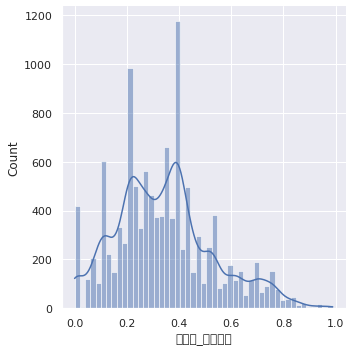

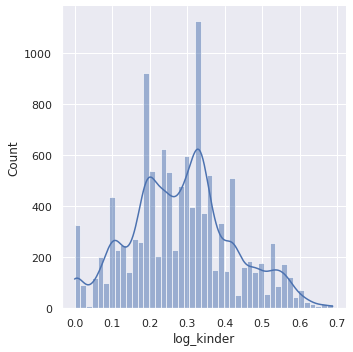

In [111]:
sns.displot(train['유치원_최소거리'],kde=True)
train['log_kinder']= np.log1p(train['유치원_최소거리'])
sns.displot(train['log_kinder'],kde=True)

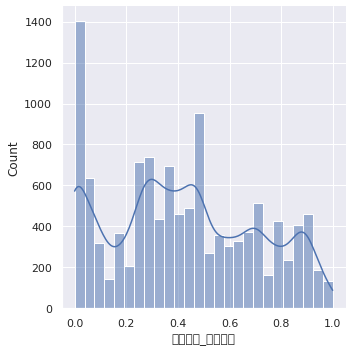

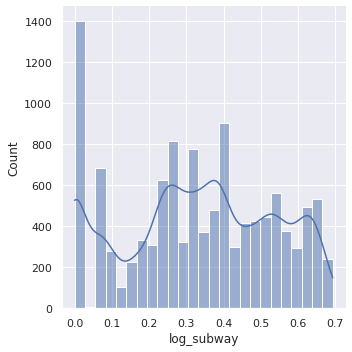

In [113]:
sns.displot(train['지하철역_최소거리'],kde=True)
train['log_subway']= np.log1p(train['지하철역_최소거리'])
sns.displot(train['log_subway'],kde=True)

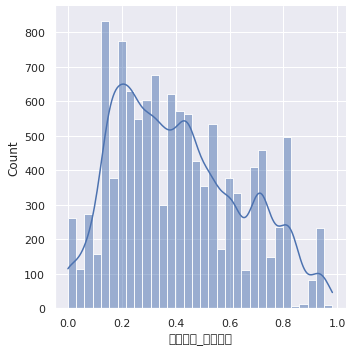

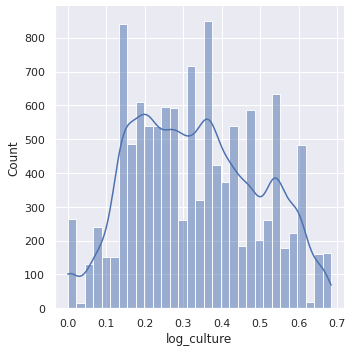

In [114]:
sns.displot(train['문화시설_최소거리'],kde=True)
train['log_culture']= np.log1p(train['문화시설_최소거리'])
sns.displot(train['log_culture'],kde=True)

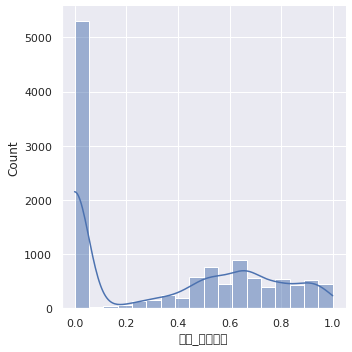

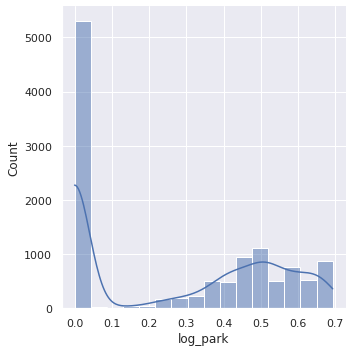

In [115]:
sns.displot(train['공원_최소거리'],kde=True)
train['log_park']= np.log1p(train['공원_최소거리'])
sns.displot(train['log_park'],kde=True)

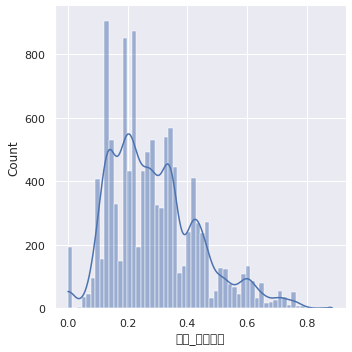

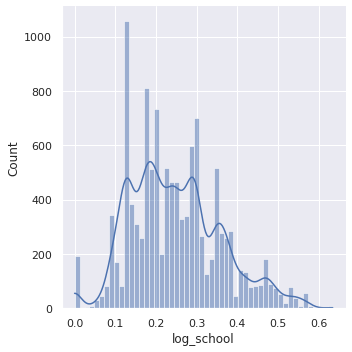

In [117]:
sns.displot(train['학교_최소거리'],kde=True)
train['log_school']= np.log1p(train['학교_최소거리'])
sns.displot(train['log_school'],kde=True)

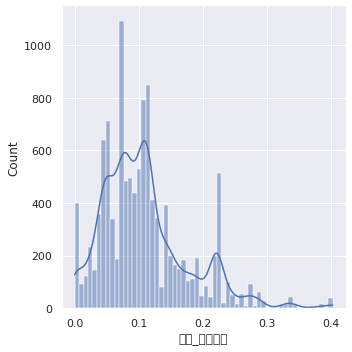

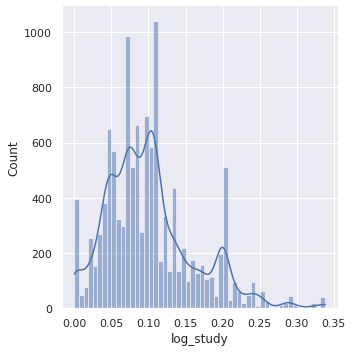

In [119]:
sns.displot(train['학원_최소거리'],kde=True)
train['log_study']= np.log1p(train['학원_최소거리'])
sns.displot(train['log_study'],kde=True)

## 데이터 정규화

In [128]:
train.columns

Index(['구', '동', '단지명', '거래금액(만원)', '혼인건수', '인구밀도', '소비자물가지수', '가계대출_십억원',
       '기준금리', '1km내_유치원수', '유치원_최소거리', '1km내_지하철역수', '지하철역_최소거리',
       '1km내_문화시설수', '문화시설_최소거리', '1km내_공원수', '공원_최소거리', '1km내_학교수', '학교_최소거리',
       '1km내_학원수', '학원_최소거리', '계약일자', 'floor_group', 'top10',
       'construction_year_group', 'area_range_group', 'boxcox_amount',
       'log_kinder', 'log_school', 'log_study', 'log_culture', 'log_park',
       'log_subway'],
      dtype='object')

In [137]:
#데이터 정규화
scaler = StandardScaler()

to_scale_col = ['혼인건수', '인구밀도', '소비자물가지수', '가계대출_십억원','기준금리',
                '1km내_유치원수','1km내_지하철역수','1km내_문화시설수','1km내_공원수','1km내_학교수', '1km내_학원수',
                'boxcox_amount', 'log_kinder','log_school','log_study', 'log_culture', 'log_park', 'log_subway']

train_to_scale = train[to_scale_col]
val_to_scale = val[to_scale_col]
test_to_scale = test[to_scale_col]

train_to_scale = scaler.fit_transform(train_to_scale)
val_to_scale = scaler.transform(val_to_scale)
test_to_scale = scaler.transform(test_to_scale)

train[to_scale_col] = train_to_scale
val[to_scale_col] = val_to_scale
test[to_scale_col] = test_to_scale

In [142]:
# dataset split
target = ['boxcox_amount']
feature = ['혼인건수', '인구밀도', '소비자물가지수', '가계대출_십억원','기준금리',
                '1km내_유치원수','1km내_지하철역수','1km내_문화시설수','1km내_공원수','1km내_학교수', '1km내_학원수',
                'floor_group', 'top10', 'construction_year_group', 'area_range_group',
           'log_kinder','log_school','log_study', 'log_culture', 'log_park', 'log_subway']

X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]